In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sklearn
import warnings

In [29]:
# Mematikan pesan peringatan agar tidak mengganggu
warnings.filterwarnings("ignore")

In [30]:
# Membaca data latih dan data uji
df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')

# Menghapus kolom 'Unnamed: 0' dari data uji
df_test = df_test.drop('Unnamed: 0', axis=1)

In [31]:
# Menampilkan informasi awal tentang data
print("Jumlah kolom dan baris pada data latih:", df_train.shape)
print("Jumlah kolom dan baris pada data uji:", df_test.shape)

Jumlah kolom dan baris pada data latih: (125973, 42)
Jumlah kolom dan baris pada data uji: (10000, 42)


In [32]:
# Menampilkan beberapa 10 baris pertama dari data latih
print("Data latih:")
df_train.head(10)

Data latih:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [33]:
# Menampilkan 10 beberapa baris pertama dari data uji
print("\nData uji:")
df_test.head(10)


Data uji:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,25,2,304,16414,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
6,0,icmp,29,3,0,44,0,0,0,0,...,54,0.21,0.02,0.00,0.00,0.00,0.00,0.78,0.98,probe
7,0,icmp,25,5,42340,7300,0,0,0,1,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.07,0.07,dos
8,4,icmp,48,2,32,93,0,0,0,0,...,124,0.87,0.02,0.01,0.02,0.00,0.00,0.07,0.00,r2l
9,0,icmp,25,2,249,5656,0,0,0,0,...,242,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [34]:
# Memisahkan fitur (X) dan label (Y) dari kedua dataset
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train['xAttack']
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test['xAttack']

In [35]:
# Menampilkan nilai unik dari label pada data latih
print("Nilai unik dari label pada data latih:")
print(Y_train.unique())

Nilai unik dari label pada data latih:
['normal' 'dos' 'r2l' 'probe' 'u2r']


In [36]:
# Preprocessing dan One-Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
# Membuat objek LabelEncoder
le = LabelEncoder()

In [38]:
# Melakukan Label Encoding pada kolom 'protocol_type' dari data latih dan data uji
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
X_test['protocol_type'] = le.transform(X_test['protocol_type'])

In [39]:
# Menampilkan beberapa baris pertama dari data latih setelah proses Label Encoding
print("Data latih setelah Label Encoding:")
X_train.head()

Data latih setelah Label Encoding:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [40]:
# Membuat objek OneHotEncoder
enc = OneHotEncoder()

In [41]:
# Label Binarizer untuk label
from sklearn.preprocessing import LabelBinarizer

In [42]:
# Melakukan Label Encoding pada label dari data latih dan data uji
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [43]:
# Menampilkan deskripsi dari label pada data latih
print("Deskripsi dari label pada data latih:")
pd.DataFrame(Y_train).describe()

Deskripsi dari label pada data latih:


,0,1,2,3,4
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.364578,0.534583,0.092528,0.007899,0.000413
std,0.481314,0.498805,0.289771,0.088522,0.020313
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Menghapus fitur dengan standard deviation kecil
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
# Menampilkan 10 fitur dengan standard deviation terendah
print("Fitur dengan 10 standard deviation terendah:")
std_X_train.nsmallest(10, columns=0)

Fitur dengan 10 standard deviation terendah:


,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [45]:
# Menghapus fitur 'num_outbound_cmds' yang memiliki standard deviation nol
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

In [46]:
# Mengonversi Y_train menjadi DataFrame dengan nama kolom yang sesuai
Y_train_df = pd.DataFrame(Y_train, columns=lb.classes_)

In [47]:
# Menggabungkan data latih dengan label
df_train = pd.concat([X_train, Y_train_df], axis=1)

In [48]:
# Menghapus fitur yang dipilih dari data latih dan data uji
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_train_stdrop = X_train.drop(stdrop_list, axis=1)
X_test_stdrop = X_test.drop(stdrop_list, axis=1)

In [49]:
# Mengonversi Y_train menjadi DataFrame dengan nama kolom yang sesuai
Y_train_df = pd.DataFrame(Y_train, columns=lb.classes_)

In [50]:
# Menggabungkan data latih setelah penghapusan fitur dengan label
df_train_stdrop = pd.concat([X_train_stdrop, Y_train_df], axis=1)

In [51]:
# Menggunakan model Linear Regression sebagai baseline
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, Y_train)
lr_score = LR.score(X_test, Y_test)
print('Score Linear Regression:', lr_score)

Score Linear Regression: 0.2381489811952669


In [52]:
# Melakukan Ensemble Feature Selection
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Inisialisasi model-model ensemble
AB = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='sqrt', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='sqrt', bootstrap=False)
GB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, max_features=None)

In [85]:
# Melatih model-model ensemble dan menampilkan skor
models = [AB, RF, ET, GB]

In [86]:
# Menggunakan argmax untuk mengonversi array biner kembali menjadi label kelas
Y_train_single = np.argmax(Y_train, axis=1)

In [87]:
# Mengonversi array biner Y_test kembali menjadi label kelas
Y_test_single = np.argmax(Y_test, axis=1)

In [88]:
from sklearn.metrics import accuracy_score

# Melatih model-model ensemble dengan label yang sudah diubah
for model in models:
    model.fit(X_train, Y_train_single)
    predictions = model.predict(X_test)
    score = accuracy_score(Y_test_single, predictions)
    print(model.__class__.__name__ + ' Score:', score)

AdaBoostClassifier Score: 0.6031
RandomForestClassifier Score: 0.772
ExtraTreesClassifier Score: 0.7613
GradientBoostingClassifier Score: 0.7682


In [89]:
# Menampilkan feature importance dari model-model ensemble
feature_importances = []
for model in models:
    feature_importances.append(model.feature_importances_)

In [90]:
# Menggabungkan feature importance dari semua model
feature_df = pd.DataFrame({'features': X_train.columns.values,
                           'AdaBoost': feature_importances[0],
                           'RandomForest': feature_importances[1],
                           'ExtraTrees': feature_importances[2],
                           'GradientBoost': feature_importances[3]})
# Menampilkan feature importance untuk beberapa fitur pertama
print("Feature Importance dari Model Ensemble:")
feature_df.head()

Feature Importance dari Model Ensemble:


,features,AdaBoost,RandomForest,ExtraTrees,GradientBoost
0,duration,0.04,0.003368,0.004258,0.001103
1,protocol_type,0.12,0.018617,0.031017,0.011428
2,service,0.09,0.029778,0.024831,0.007743
3,flag,0.01,0.012721,0.005825,0.001167
4,src_bytes,0.18,0.271317,0.015589,0.361551


In [93]:
# Memilih fitur terbaik dari setiap model ensemble
selected_features = feature_df.nlargest(12, 'AdaBoost')['features'].values.tolist()
selected_features += feature_df.nlargest(12, 'RandomForest')['features'].values.tolist()
selected_features += feature_df.nlargest(12, 'ExtraTrees')['features'].values.tolist()
selected_features += feature_df.nlargest(12, 'GradientBoost')['features'].values.tolist()
selected_features = list(set(selected_features))

In [96]:
# Melatih ulang model dengan fitur yang dipilih
X_train_ens = X_train[selected_features]
X_test_ens = X_test[selected_features]
Y_train_single = np.argmax(Y_train, axis=1)
Y_test_single = np.argmax(Y_test, axis=1)

for model in models:
    model.fit(X_train_ens, Y_train_single)
    predictions = model.predict(X_test_ens)
    score = accuracy_score(Y_test_single, predictions)
    print(model.__class__.__name__ + ' Score after feature selection:', score)

AdaBoostClassifier Score after feature selection: 0.5406
RandomForestClassifier Score after feature selection: 0.7614
ExtraTreesClassifier Score after feature selection: 0.7549
GradientBoostingClassifier Score after feature selection: 0.7578


<Axes: >

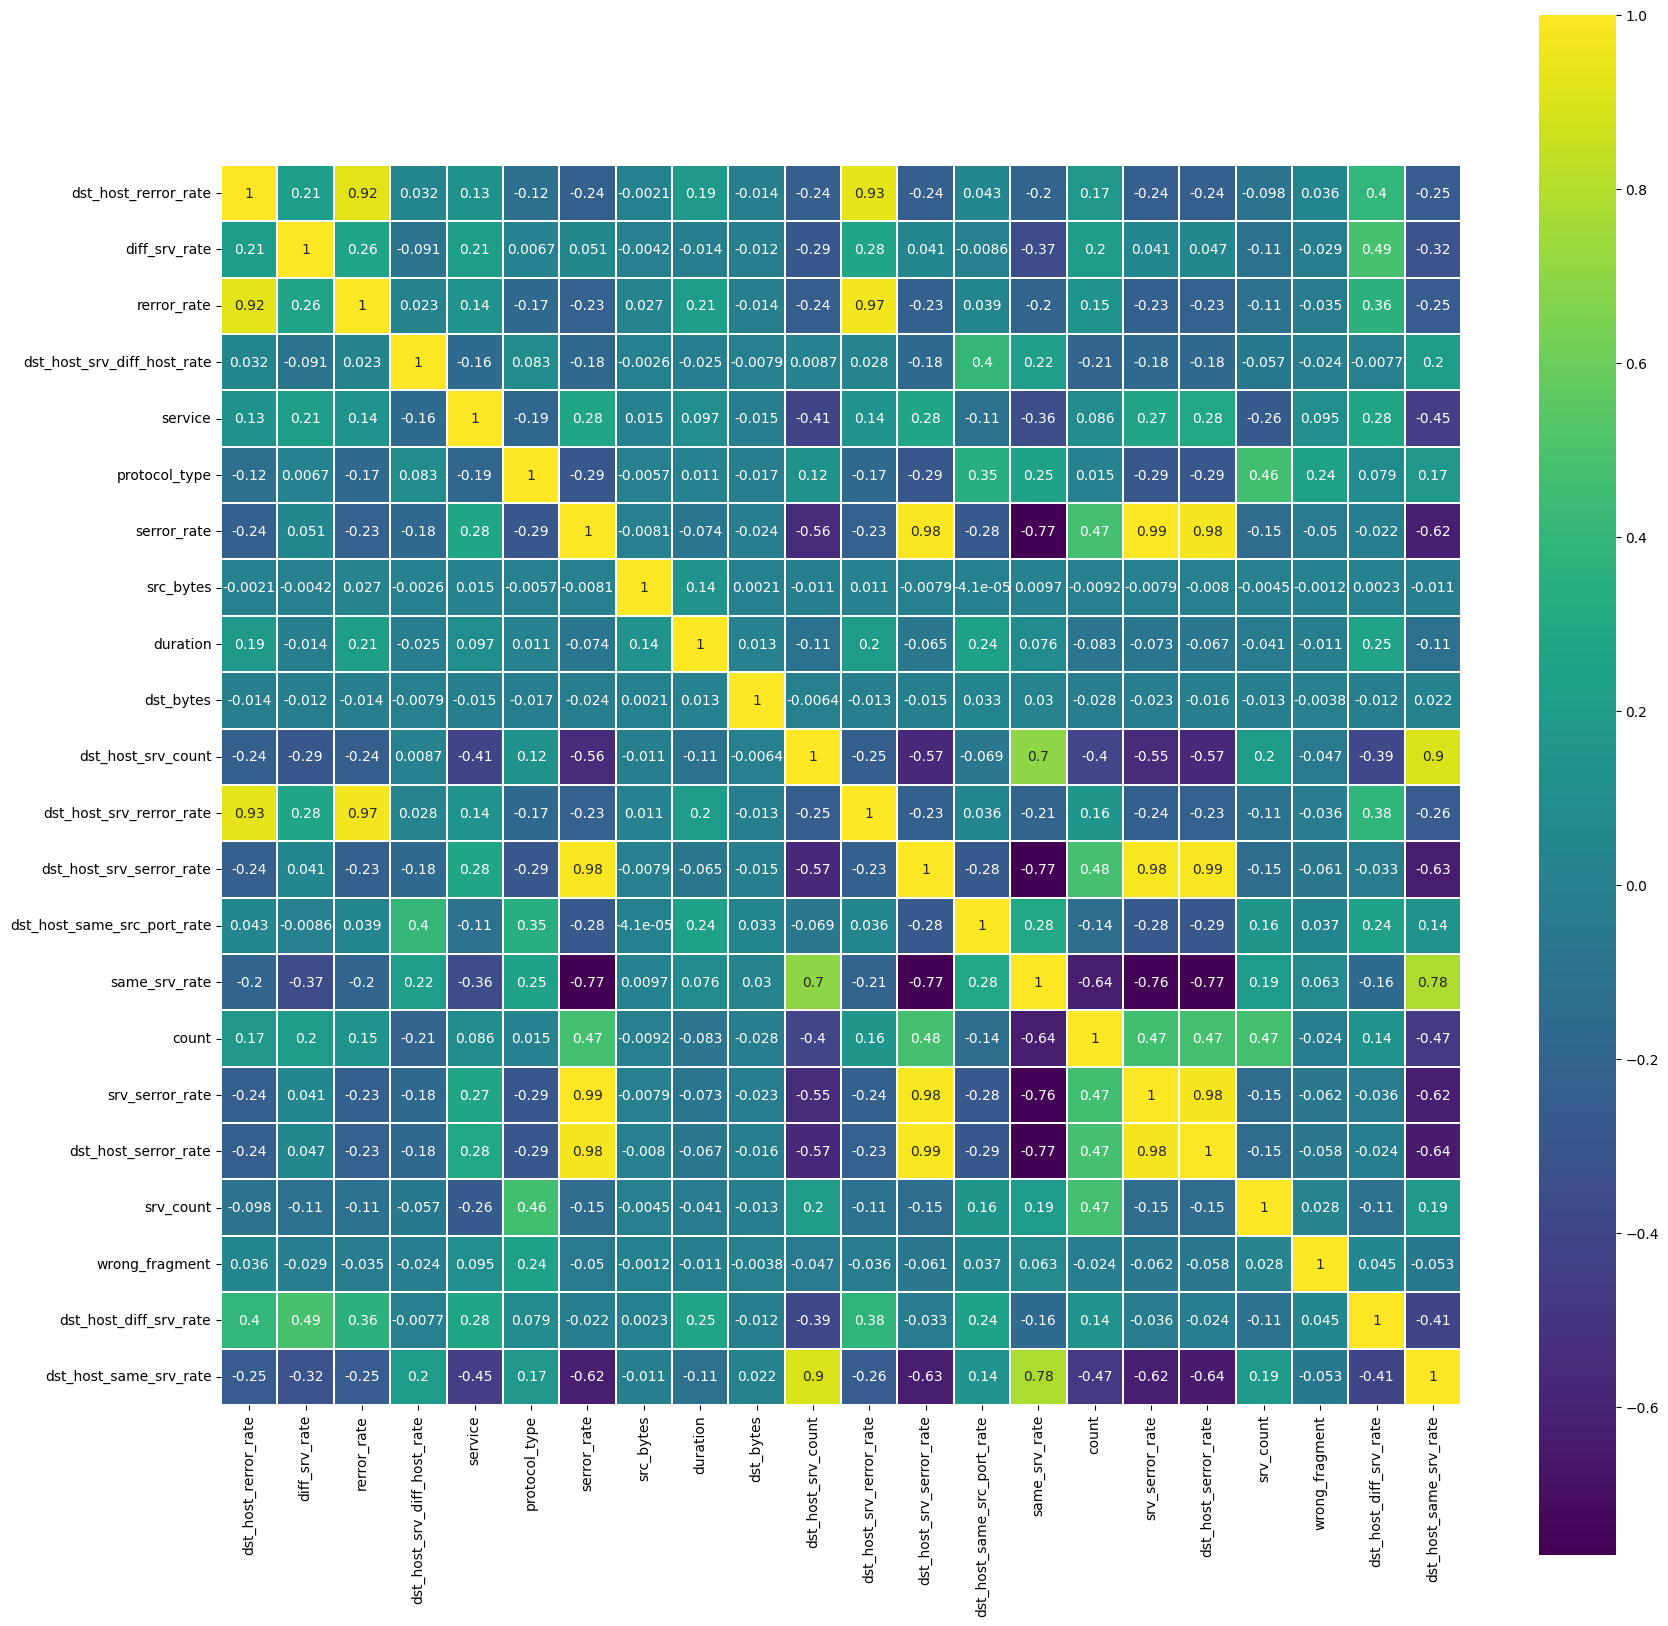

In [97]:
# Analisis korelasi antar fitur
correlation_sample = X_train_ens[:10000]
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_sample.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.viridis, annot=True)

In [99]:
# Menghapus fitur dengan korelasi tinggi
selected_cor = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected_cor, axis=1)
X_test_cordrop = X_test_ens.drop(selected_cor, axis=1)

In [102]:
# Melatih ulang model setelah penghapusan fitur dengan korelasi tinggi
Y_test_single = np.argmax(Y_test, axis=1)

for model in models:
    model.fit(X_train_cordrop, Y_train_single)
    score = model.score(X_test_cordrop, Y_test_single)
    print(model.__class__.__name__ + ' Score after correlation analysis:', score)

AdaBoostClassifier Score after correlation analysis: 0.7226
RandomForestClassifier Score after correlation analysis: 0.7558
ExtraTreesClassifier Score after correlation analysis: 0.7735
GradientBoostingClassifier Score after correlation analysis: 0.759


In [104]:
# Menampilkan skor dari semua model
Y_test_single = np.argmax(Y_test, axis=1)

model_names = ['AdaBoost', 'RandomForest', 'ExtraTrees', 'GradientBoost']
model_scores = [model.score(X_test_cordrop, Y_test_single) for model in models]
model_scores.append(lr_score)  # Menambahkan skor Linear Regression
model_names.append('LinearRegression')
model_names.append('MLP')

In [105]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol=0.0001)
MLP.fit(X_train_cordrop, Y_train)
mlp_score = MLP.score(X_test_cordrop, Y_test)

model_scores.append(mlp_score)
print('MLP Score:', mlp_score)

MLP Score: 0.6728


In [106]:
# Menampilkan skor akhir dari semua model
final_model_scores = pd.DataFrame({'Model': model_names, 'Score': model_scores})
print("Skor Akhir dari Semua Model:")
print(final_model_scores)

Skor Akhir dari Semua Model:
              Model     Score
0          AdaBoost  0.722600
1      RandomForest  0.755800
2        ExtraTrees  0.773500
3     GradientBoost  0.759000
4  LinearRegression  0.238149
5               MLP  0.672800


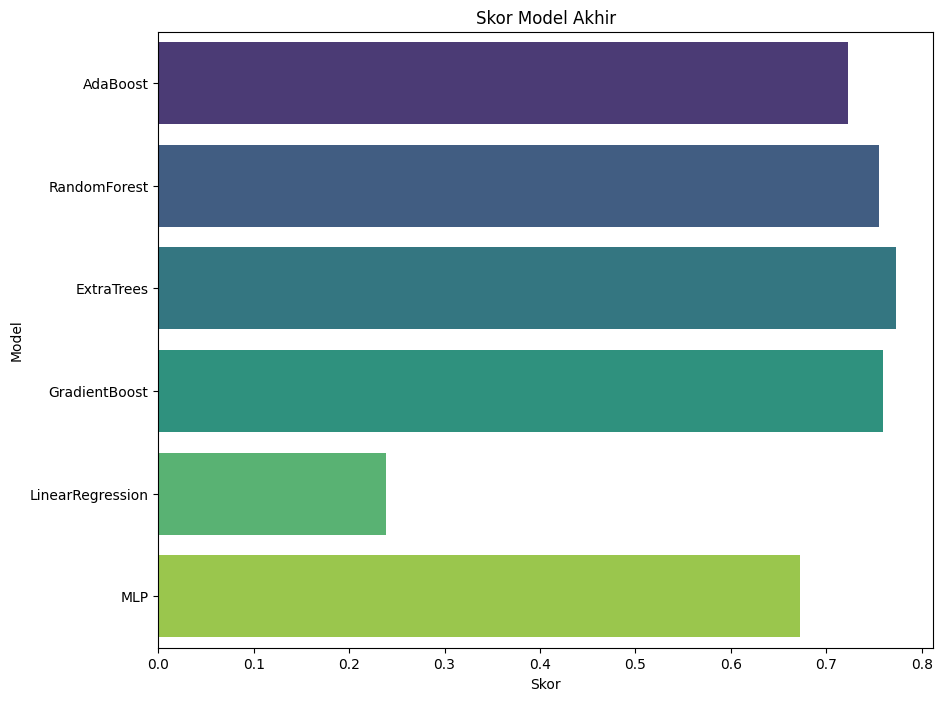

In [107]:
# Visualisasi skor model
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Model', data=final_model_scores, palette='viridis')
plt.title('Skor Model Akhir')
plt.xlabel('Skor')
plt.ylabel('Model')
plt.show()